In [36]:
# conda install -c anaconda graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Lenovo\anaconda3.x

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         3.1 MB  anaconda
    graphviz-2.38              |       hfd603c8_2        37.7 MB  anaconda
    ------------------------------------------------------------
                                           Total:        40.8 MB

The following NEW packages will be INSTALLED:

  graphviz           anaconda/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.2-py37_0 --> anaconda::conda-4.8.4-py37_0




graphviz-2.38        | 37.7 MB   |            |   0% 
graphviz-2.38        | 37.7 MB   |            |   0% 
graphviz-2.38        | 37.7 MB   |            |   0% 
graphviz



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda




In [53]:
# conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Lenovo\anaconda3.x

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py37hc8dfbb8_2         3.1 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.4-py37_0 --> conda-forge::conda-4.8.4-py37hc8dfbb8_2




conda-4.8.4

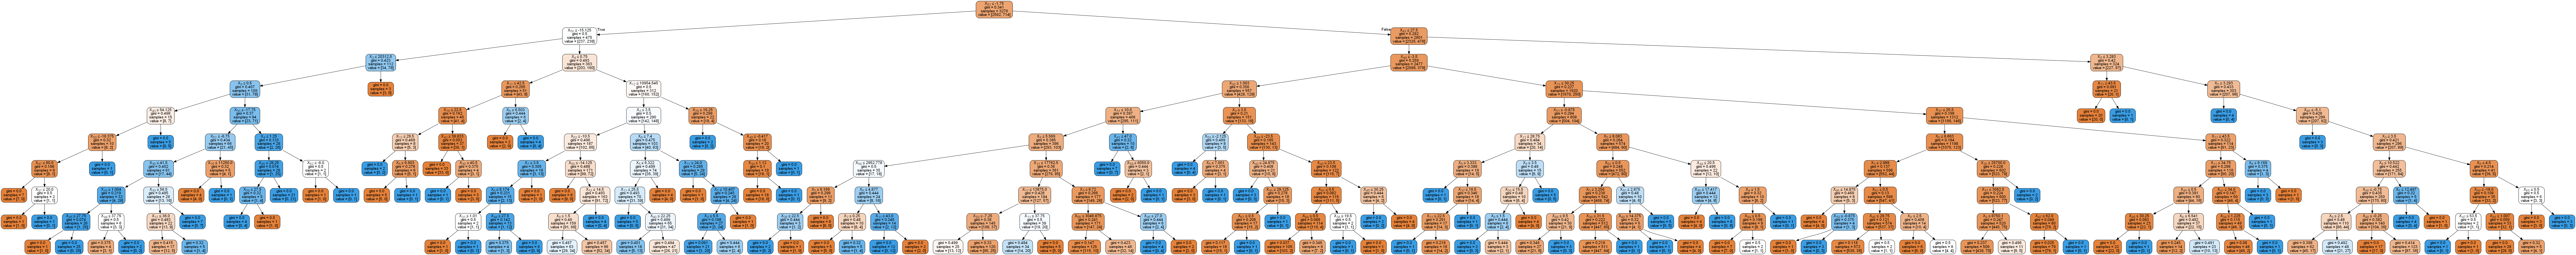

In [54]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(dt_model, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

**LOAD THE DATASET**

In [2]:
#reading the data
data=pd.read_csv('cleaned_loan.csv')

In [3]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
#shape of the data
data.shape

(4368, 78)

In [5]:
#first five rows of the data
data.head()

,loannumber,loanamount,totaldue,termdays,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,creationdate_dow,additional_charges,...,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank
0,12.0,30000.0,34500.0,30.0,0.0,3.432010,6.433055,0.0,1.0,4500.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,15000.0,17250.0,30.0,1.0,3.885298,7.320700,0.0,2.0,2250.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,20000.0,22250.0,15.0,0.0,11.139350,10.292041,0.0,3.0,2250.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,10000.0,11500.0,15.0,1.0,3.985770,7.491708,0.0,3.0,1500.0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,40000.0,44000.0,30.0,0.0,7.457913,9.076574,0.0,0.0,4000.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#checking missing values in the data
data.isnull().sum()

loannumber                       0
loanamount                       0
totaldue                         0
termdays                         0
bank_account_type                0
                                ..
bank_name_clients_UBA            0
bank_name_clients_Union Bank     0
bank_name_clients_Unity Bank     0
bank_name_clients_Wema Bank      0
bank_name_clients_Zenith Bank    0
Length: 78, dtype: int64

In [7]:
# train, validate, test = np.split(data.sample(frac=1), [int(.8*len(data)), int(.9*len(data))])

In [8]:
# train.shape,validate.shape,test.shape

((3494, 78), (437, 78), (437, 78))

In [7]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

In [8]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [9]:
# #creating the train and test set
# X_train, X_test, y_train1, y_test = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.15)

In [12]:
X_train1.shape,y_train1.shape

((3712, 77), (3712,))

In [13]:
# #creating validation set from training set
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.10)

ValueError: Found input variables with inconsistent numbers of samples: [3712, 4368]

In [23]:
#Scalig the train,validation and testing datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_valid_scaled = scaler.transform(X_valid)
X_valid = pd.DataFrame(x_valid_scaled, columns=X_valid.columns)

# x_test_scaled = scaler.transform(X_test)
# X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [24]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.782058
1    0.217942
Name: good_bad_flag, dtype: float64

In [25]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.782012
1    0.217988
Name: good_bad_flag, dtype: float64

In [26]:
# # distribution in testing set
# y_test.value_counts(normalize=True)

In [27]:
#shape of training set
X_train.shape, y_train.shape

((3712, 77), (3712,))

In [28]:
#shape of validation set
X_valid.shape, y_valid.shape

((656, 77), (656,))

In [29]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [30]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

features : <br>
    - max_depth 
    -max_features 
    -max_leaf_nodes
    -min_samples_leaf
    -min_samples_split

In [31]:
#checking the training score
dt_model.score(X_train, y_train)

0.9989224137931034

In [32]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.6951219512195121

In [33]:
pred_train=dt_model.predict(X_train)

In [34]:
pred_valid=dt_model.predict(X_valid)

In [35]:
f1_train=f1_score(y_train,pred_train)
f1_valid=f1_score(y_valid,pred_valid)

In [36]:
print("f1 score for training data ",f1_train)
print("f1 score for validation data ",f1_valid)

f1 score for training data  0.9975216852540273
f1 score for validation data  0.2647058823529412


In [37]:
#predictions on validation set
dt_model.predict(X_valid)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
dt_model.predict_proba(X_valid)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## 1.Changing the max_depth

In [49]:
train_f1 = []
validation_f1 = []
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=27, random_state=10)
    dt_model.fit(X_train, y_train)
    pred_train=dt_model.predict(X_train)
    pred_test=dt_model.predict(X_valid)
    train_f1.append(f1_score(y_train, pred_train))
    validation_f1.append(f1_score(y_valid, pred_test))
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [50]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_f1':train_f1, 'valid_f1':validation_f1,'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_f1,valid_f1,train_acc,valid_acc
0,1,0.000000,0.000000,0.782058,0.782012
1,2,0.395294,0.422535,0.792295,0.812500
2,3,0.343059,0.319149,0.799838,0.804878
3,4,0.399019,0.363636,0.801994,0.807927
4,5,0.294574,0.182927,0.803879,0.795732


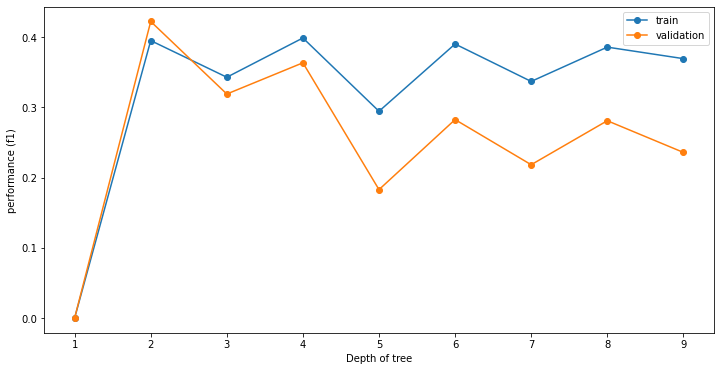

In [51]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_f1'], marker='o',label='train')
plt.plot(frame['max_depth'], frame['valid_f1'], marker='o',label='validation')
plt.xlabel('Depth of tree')
plt.ylabel('performance (f1)')
plt.legend()

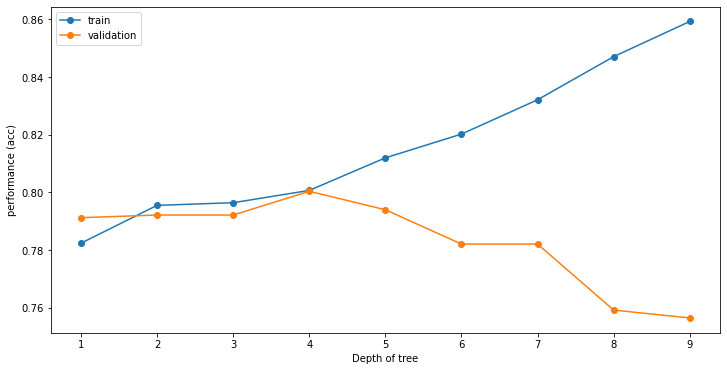

In [28]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label='train')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o',label='validation')
plt.xlabel('Depth of tree')
plt.ylabel('performance (acc)')
plt.legend()

In [42]:
from sklearn import tree

In [43]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [44]:
!dot -Tpng tree.dot -o tree.png

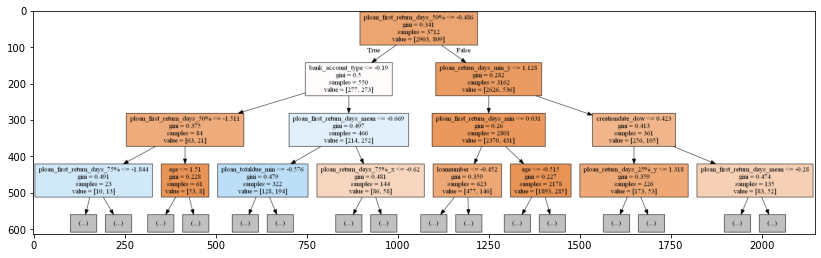

In [45]:
image = plt.imread('tree.png')
plt.figure(figsize=(14,14))
plt.imshow(image)

depth 1 :0.42 

# 2. Changing the min_samples_split

In [46]:
train_f1 = []
validation_f1 = []
train_accuracy=[]
validation_accuracy=[]
for min_samples in range(4,35):
    dt_model = DecisionTreeClassifier(min_samples_split=min_samples, random_state=10)
    dt_model.fit(X_train, y_train)
    pred_train=dt_model.predict(X_train)
    pred_test=dt_model.predict(X_valid)
    train_f1.append(f1_score(y_train, pred_train))
    validation_f1.append(f1_score(y_valid, pred_test))
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [47]:
frame_min_sample_split=pd.DataFrame({'min_sample_Split':range(4,35), 'train_f1':train_f1, 'valid_f1':validation_f1,'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame_min_sample_split

,min_sample_Split,train_f1,valid_f1,train_acc,valid_acc
0,4,0.936983,0.300000,0.973330,0.722561
1,5,0.919334,0.273063,0.966056,0.699695
2,6,0.897959,0.282353,0.956897,0.721037
3,7,0.876215,0.257812,0.948545,0.710366
4,8,0.855844,0.254980,0.940194,0.714939
5,9,0.834964,0.243137,0.931843,0.705793
6,10,0.820786,0.244898,0.927532,0.717988
7,11,0.809241,0.245902,0.922144,0.719512
8,12,0.798653,0.246914,0.919450,0.721037
9,13,0.778305,0.237288,0.911907,0.725610


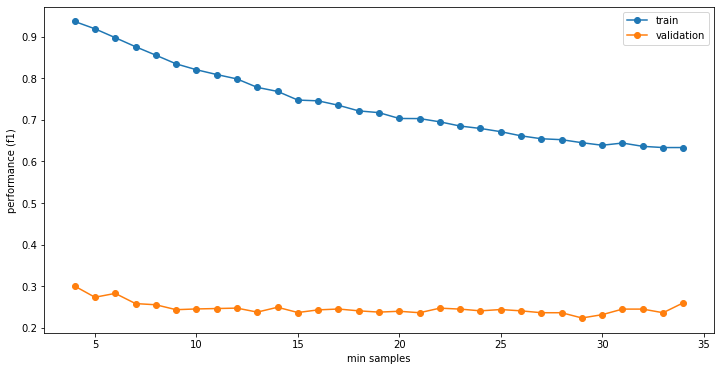

In [48]:
plt.figure(figsize=(12,6))
plt.plot(frame_min_sample_split['min_sample_Split'], frame_min_sample_split['train_f1'], marker='o',label='train')
plt.plot(frame_min_sample_split['min_sample_Split'], frame_min_sample_split['valid_f1'], marker='o',label='validation')
plt.xlabel('min samples')
plt.ylabel('performance (f1)')
plt.legend()

## 3. Changing the max_features

In [36]:
train_f1 = []
validation_f1 = []
train_accuracy=[]
validation_accuracy=[]
for maxfeatures in range(2,25):
    dt_model = DecisionTreeClassifier(max_features=maxfeatures, random_state=10)
    dt_model.fit(X_train, y_train)
    pred_train=dt_model.predict(X_train)
    pred_test=dt_model.predict(X_valid)
    train_f1.append(f1_score(y_train, pred_train))
    validation_f1.append(f1_score(y_valid, pred_test))
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [37]:
frame_maxfeatures=pd.DataFrame({'maxfeatures':range(2,25), 'train_f1':train_f1, 'valid_f1':validation_f1,'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame_maxfeatures

,maxfeatures,train_f1,valid_f1,train_acc,valid_acc
0,2,0.997895,0.294243,0.999084,0.696886
1,3,0.997895,0.293737,0.999084,0.700549
2,4,0.997895,0.295276,0.999084,0.672161
3,5,0.997895,0.346154,0.999084,0.719780
4,6,0.997895,0.319361,0.999084,0.687729
5,7,0.997895,0.318182,0.999084,0.697802
6,8,0.997895,0.276596,0.999084,0.688645
7,9,0.997895,0.329167,0.999084,0.705128
8,10,0.997895,0.292887,0.999084,0.690476
9,11,0.997895,0.303158,0.999084,0.696886


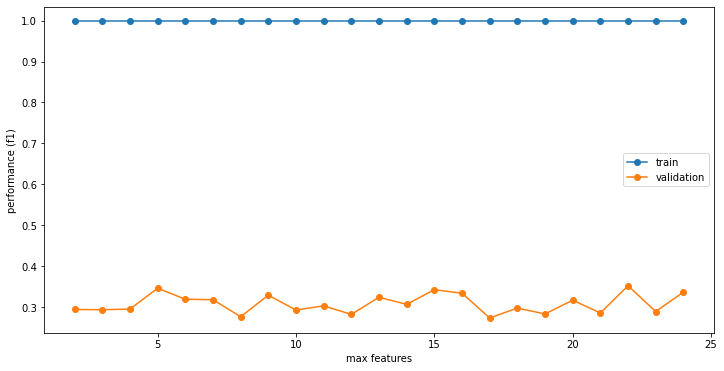

In [38]:
plt.figure(figsize=(12,6))
plt.plot(frame_maxfeatures['maxfeatures'], frame_maxfeatures['train_f1'], marker='o',label='train')
plt.plot(frame_maxfeatures['maxfeatures'], frame_maxfeatures['valid_f1'], marker='o',label='validation')
plt.xlabel('max features')
plt.ylabel('performance (f1)')
plt.legend()

--overfitting

## 4.Changing the max_leaf_nodes

In [39]:
train_f1 = []
validation_f1 = []
train_accuracy=[]
validation_accuracy=[]
for maxleafs in range(10,50):
    dt_model = DecisionTreeClassifier(max_leaf_nodes=maxleafs, random_state=10)
    dt_model.fit(X_train, y_train)
    pred_train=dt_model.predict(X_train)
    pred_test=dt_model.predict(X_valid)
    train_f1.append(f1_score(y_train, pred_train))
    validation_f1.append(f1_score(y_valid, pred_test))
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [40]:
frame_maxLeafNodes=pd.DataFrame({'max_leaf_nodes':range(10,50), 'train_f1':train_f1, 'valid_f1':validation_f1,'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame_maxLeafNodes

,max_leaf_nodes,train_f1,valid_f1,train_acc,valid_acc
0,10,0.434109,0.418848,0.799451,0.796703
1,11,0.439692,0.430052,0.800061,0.798535
2,12,0.439692,0.430052,0.800061,0.798535
3,13,0.458609,0.429293,0.800366,0.793040
4,14,0.459482,0.430769,0.802503,0.796703
5,15,0.463840,0.430769,0.803114,0.796703
6,16,0.381890,0.308157,0.808303,0.790293
7,17,0.401163,0.317365,0.811355,0.791209
8,18,0.401163,0.317365,0.811355,0.791209
9,19,0.406551,0.317365,0.811966,0.791209


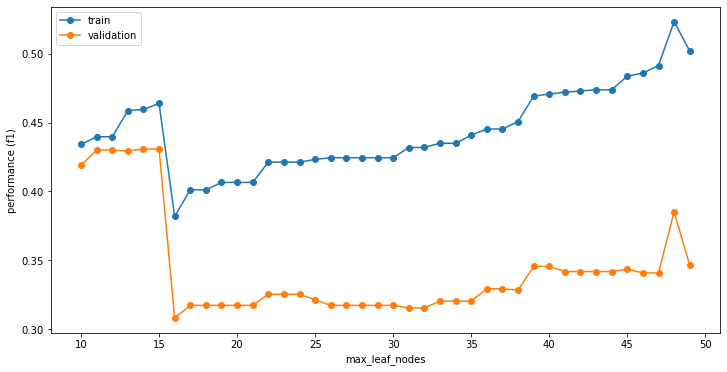

In [41]:
plt.figure(figsize=(12,6))
plt.plot(frame_maxLeafNodes['max_leaf_nodes'], frame_maxLeafNodes['train_f1'], marker='o',label='train')
plt.plot(frame_maxLeafNodes['max_leaf_nodes'], frame_maxLeafNodes['valid_f1'], marker='o',label='validation')
plt.xlabel('max_leaf_nodes')
plt.ylabel('performance (f1)')
plt.legend()

--max leaf nodes== 14,15 valid_f1 0.43

#  5.Changing the min_sample_leaf

In [42]:
train_f1 = []
validation_f1 = []
train_accuracy=[]
validation_accuracy=[]
for minSampleLeaf in range(4,40):
    dt_model = DecisionTreeClassifier(min_samples_leaf=minSampleLeaf, random_state=10)
    dt_model.fit(X_train, y_train)
    pred_train=dt_model.predict(X_train)
    pred_test=dt_model.predict(X_valid)
    train_f1.append(f1_score(y_train, pred_train))
    validation_f1.append(f1_score(y_valid, pred_test))
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [43]:
frame_min_sample_leaf=pd.DataFrame({'min_sample_leaf':range(4,40), 'train_f1':train_f1, 'valid_f1':validation_f1,'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame_min_sample_leaf

,min_sample_leaf,train_f1,valid_f1,train_acc,valid_acc
0,4,0.770642,0.330233,0.908425,0.736264
1,5,0.747955,0.303167,0.896520,0.717949
2,6,0.704599,0.317757,0.884310,0.732601
3,7,0.672414,0.352941,0.872405,0.748168
4,8,0.616427,0.316327,0.861722,0.754579
5,9,0.602187,0.312020,0.855617,0.753663
6,10,0.583474,0.320802,0.849206,0.751832
7,11,0.575251,0.331633,0.844933,0.760073
8,12,0.565254,0.311688,0.840354,0.757326
9,13,0.550167,0.310078,0.835775,0.755495


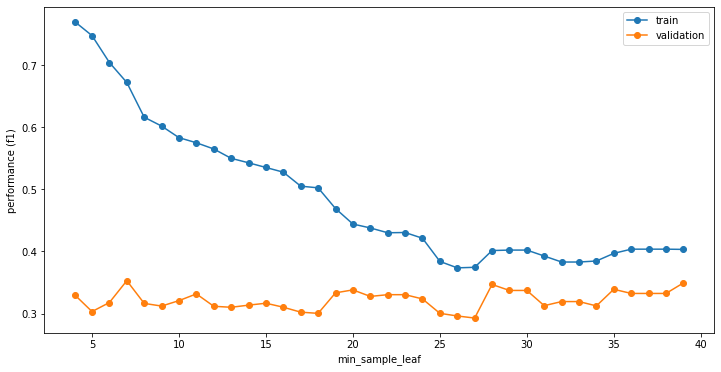

In [44]:
plt.figure(figsize=(12,6))
plt.plot(frame_min_sample_leaf['min_sample_leaf'], frame_min_sample_leaf['train_f1'], marker='o',label='train')
plt.plot(frame_min_sample_leaf['min_sample_leaf'], frame_min_sample_leaf['valid_f1'], marker='o',label='validation')
plt.xlabel('min_sample_leaf')
plt.ylabel('performance (f1)')
plt.legend()

# tuning with two parameters

In [47]:
# train_f1 = []
# validation_f1 = []
# train_accuracy=[]
# validation_accuracy=[]
# depth=[]
# max_leaf_nodes=[]
# for depth in range(2,31):
#     for max_leaf_nodes in range(2,31):
#         depth.append(depth)
#         max_leaf_nodes.append(max_leaf_nodes)
#         dt_model = DecisionTreeClassifier(max_depth=depth,max_leaf_nodes=max_leaf_nodes, random_state=10)
#         dt_model.fit(X_train, y_train)
#         pred_train=dt_model.predict(X_train)
#         pred_test=dt_model.predict(X_valid)
#         train_f1.append(f1_score(y_train, pred_train))
#         validation_f1.append(f1_score(y_valid, pred_test))
#         train_accuracy.append(dt_model.score(X_train, y_train))
#         validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [49]:
# frame1=pd.DataFrame({'Depth':depth,'max_leaf_nodes':max_leaf_nodes, 'train_f1':train_f1, 'valid_f1':validation_f1,'train_acc':train_accuracy,'valid_acc':validation_accuracy})
# frame1

,Depth,max_leaf_nodes,train_f1,valid_f1,train_acc,valid_acc
0,30,30,0.400336,0.421320,0.782357,0.791209
1,30,30,0.400336,0.421320,0.782357,0.791209
2,30,30,0.188862,0.162362,0.795482,0.792125
3,30,30,0.188862,0.162362,0.795482,0.792125
4,30,30,0.188862,0.162362,0.795482,0.792125
...,...,...,...,...,...,...
836,30,30,0.424474,0.317365,0.816239,0.791209
837,30,30,0.424474,0.317365,0.816239,0.791209
838,30,30,0.424474,0.317365,0.816239,0.791209
839,30,30,0.424474,0.317365,0.816239,0.791209


--overfitting(changing max features)

--max leaf nodes== 14,15 valid_f1 0.43

---depth=1  valid_f1= 0.42

